<a href="https://colab.research.google.com/github/amaluvincent/Fake-News-Detection/blob/main/data_processing_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Setting up the enevironment

In [49]:
!pip install pandas numpy matplotlib seaborn scikit-learn nltk
!pip install tensorflow keras


# 2.Importing libraraies

In [112]:
# import necessary libabaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 3.Load dataset

In [113]:
# Load the ISOT dataset
true_news = pd.read_csv('/content/True.csv')
fake_news =  pd.read_csv('/content/Fake.csv')

# checking the size of each files
print('true:',true_news.shape)
print('fake:', fake_news.shape)


true: (21417, 4)
fake: (23481, 4)


# 4. Data cleaning and preparation

In [52]:
# Add a label to each dataframe
true_news['label'] = 0   # 0 for legitimate news
fake_news['label'] = 1   # 1 for fake news

# Combine both datasets
df = pd.concat([true_news, fake_news],ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)  # shuffle the data

# Print the combined dataset (first few rows)
print(df.head(5))
print(df.shape)



                                               title  \
0  BRILLIANT TRUMP ADVISER: “The Extreme Media” H...   
1  Trump still weighing whether to recognize Jeru...   
2  WHAT THE MEDIA’S NOT TELLING YOU About The Man...   
3  Democratic White House hopefuls cheer end of P...   
4  China says war on Korean peninsula will have n...   

                                                text       subject  \
0  What a treat! Laura Ingraham interviewed Presi...      politics   
1  WASHINGTON (Reuters) - U.S. President Donald T...     worldnews   
2  Just another nice immigrant family trying to a...      politics   
3  (Reuters) - Democratic presidential candidates...  politicsNews   
4  BEIJING (Reuters) - China said on Tuesday war ...     worldnews   

                  date  label  
0          Aug 8, 2017      1  
1    December 3, 2017       0  
2         May 23, 2017      1  
3       April 6, 2016       0  
4  September 26, 2017       0  
(44898, 5)


In [53]:
# print dataset info
print(df.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB
None


In [54]:
# Removing unnecessary column(date)
df = df.drop(columns=["date"])
print(df.head())

                                               title  \
0  BRILLIANT TRUMP ADVISER: “The Extreme Media” H...   
1  Trump still weighing whether to recognize Jeru...   
2  WHAT THE MEDIA’S NOT TELLING YOU About The Man...   
3  Democratic White House hopefuls cheer end of P...   
4  China says war on Korean peninsula will have n...   

                                                text       subject  label  
0  What a treat! Laura Ingraham interviewed Presi...      politics      1  
1  WASHINGTON (Reuters) - U.S. President Donald T...     worldnews      0  
2  Just another nice immigrant family trying to a...      politics      1  
3  (Reuters) - Democratic presidential candidates...  politicsNews      0  
4  BEIJING (Reuters) - China said on Tuesday war ...     worldnews      0  


In [55]:
df = df.drop(columns=["title"])
print(df.head())

                                                text       subject  label
0  What a treat! Laura Ingraham interviewed Presi...      politics      1
1  WASHINGTON (Reuters) - U.S. President Donald T...     worldnews      0
2  Just another nice immigrant family trying to a...      politics      1
3  (Reuters) - Democratic presidential candidates...  politicsNews      0
4  BEIJING (Reuters) - China said on Tuesday war ...     worldnews      0


In [56]:
# convert to lowercase

df['text'] = df['text'].str.lower()

# Verify by printing the first few rows of the updated dataframe
print(df[[ 'text']].head())

                                                text
0  what a treat! laura ingraham interviewed presi...
1  washington (reuters) - u.s. president donald t...
2  just another nice immigrant family trying to a...
3  (reuters) - democratic presidential candidates...
4  beijing (reuters) - china said on tuesday war ...


In [57]:
# Remove punctuation

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))
df['text'] = df['text'].apply(remove_punctuation)

# Verify by printing the first few rows of the updated dataframe
print(df.head())


                                                text       subject  label
0  what a treat laura ingraham interviewed presid...      politics      1
1  washington reuters  us president donald trump ...     worldnews      0
2  just another nice immigrant family trying to a...      politics      1
3  reuters  democratic presidential candidates hi...  politicsNews      0
4  beijing reuters  china said on tuesday war on ...     worldnews      0


In [59]:

# Set the stopwords for the English language
stop_words = set(stopwords.words('english'))

# Define a function to remove stopwords
def remove_stopwords(text):
    # Tokenize the text into words
    words = text.split()
    # Remove stopwords
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # Join the filtered words back into a single string
    return ' '.join(filtered_words)

# Apply the function to the 'title' and 'text' colum
df['text'] = df['text'].apply(remove_stopwords)

# Verify by printing the first few rows of the updated dataframe
print(df[['text']].head())


                                                text
0  treat laura ingraham interviewed president tru...
1  washington reuters us president donald trump y...
2  another nice immigrant family trying assimilat...
3  reuters democratic presidential candidates hil...
4  beijing reuters china said tuesday war korean ...


# Data exploration

subject
politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64


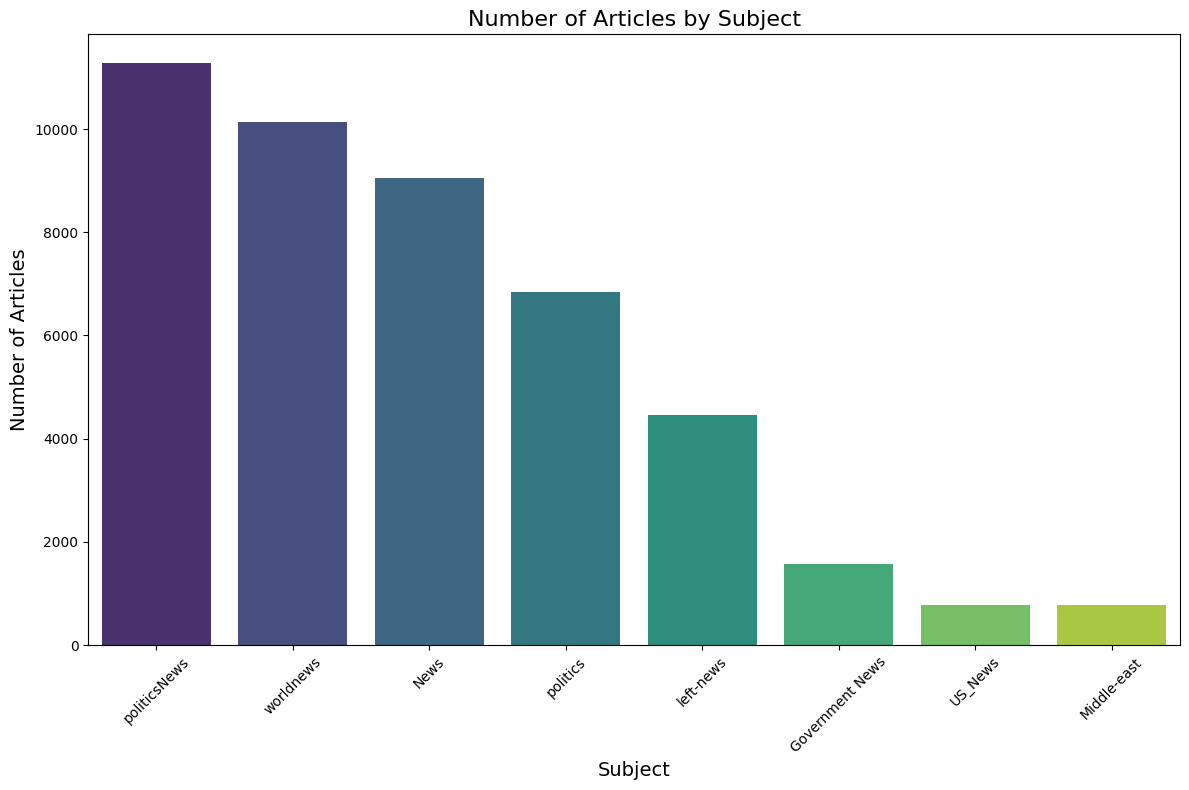

In [62]:
import warnings
# Suppress warnings
warnings.filterwarnings("ignore")

# Count the number of articles by subject
subject_counts = df['subject'].value_counts()
print(subject_counts)
# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=subject_counts.index, y=subject_counts.values, palette='viridis')
plt.title('Number of Articles by Subject', fontsize=16)
plt.xlabel('Subject', fontsize=14)
plt.ylabel('Number of Articles', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


label
1    23481
0    21417
Name: count, dtype: int64


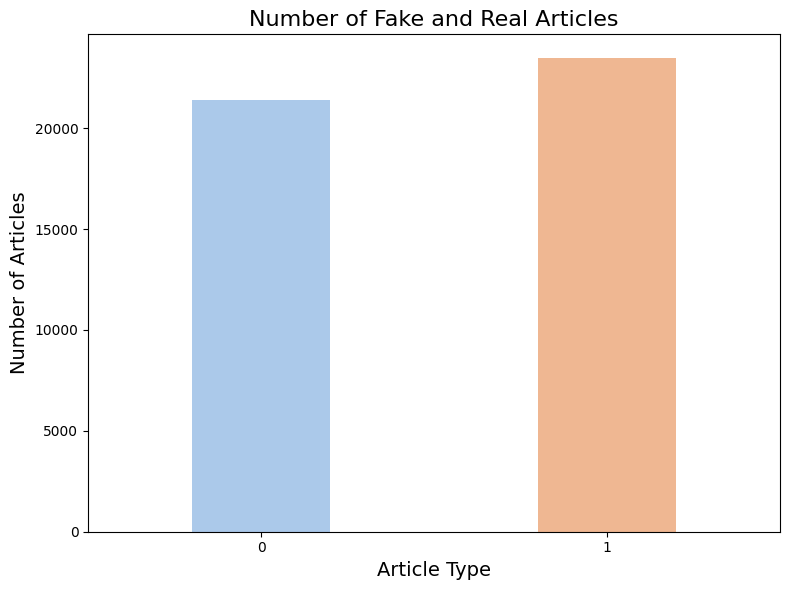

In [74]:
# How many fake and real articles?
article_counts = df['label'].value_counts()
print(article_counts)

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=article_counts.index, y=article_counts.values, palette='pastel', width=0.4)
plt.title('Number of Fake and Real Articles', fontsize=16)
plt.xlabel('Article Type', fontsize=14)
plt.ylabel('Number of Articles', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


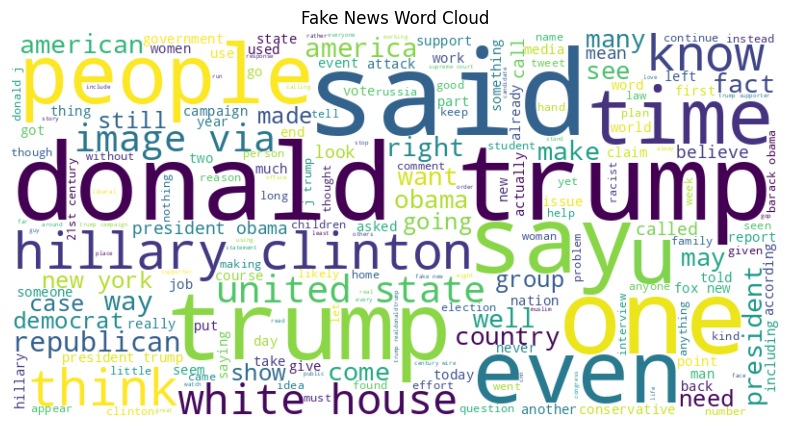

In [78]:
# Word cloud for fake news

fake_words = ' '.join(df[df['label'] == 1]['text'])
wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Fake News Word Cloud')
plt.show()

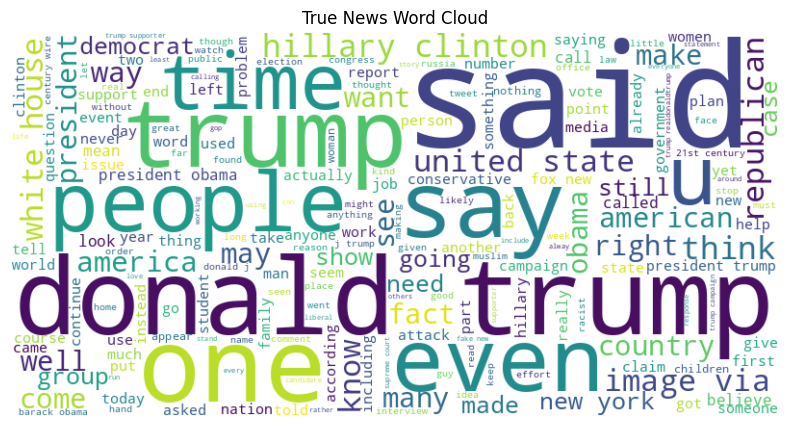

In [79]:
# Word cloud for true news

true_words = ' '.join(df[df['label'] == 1]['text'])
wordcloud_true = WordCloud(width=800, height=400, background_color='white').generate(true_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.axis('off')
plt.title('True News Word Cloud')
plt.show()

Top 20 words in Fake News: [('trump', 73422), ('said', 31008), ('people', 25941), ('president', 25495), ('would', 23420), ('one', 22865), ('us', 22005), ('clinton', 17957), ('obama', 17760), ('like', 17596), ('donald', 17101), ('also', 15221), ('new', 14135), ('news', 14099), ('even', 13658), ('hillary', 13510), ('white', 12767), ('time', 12689), ('state', 12494), ('via', 11164)]
Top 20 words in Real News: [('said', 99017), ('trump', 42061), ('us', 40847), ('would', 31418), ('reuters', 28306), ('president', 25223), ('state', 18547), ('government', 17851), ('new', 16712), ('house', 16294), ('states', 16063), ('also', 15935), ('united', 15566), ('republican', 15273), ('people', 14604), ('told', 14243), ('could', 13650), ('last', 12579), ('one', 12295), ('washington', 12088)]


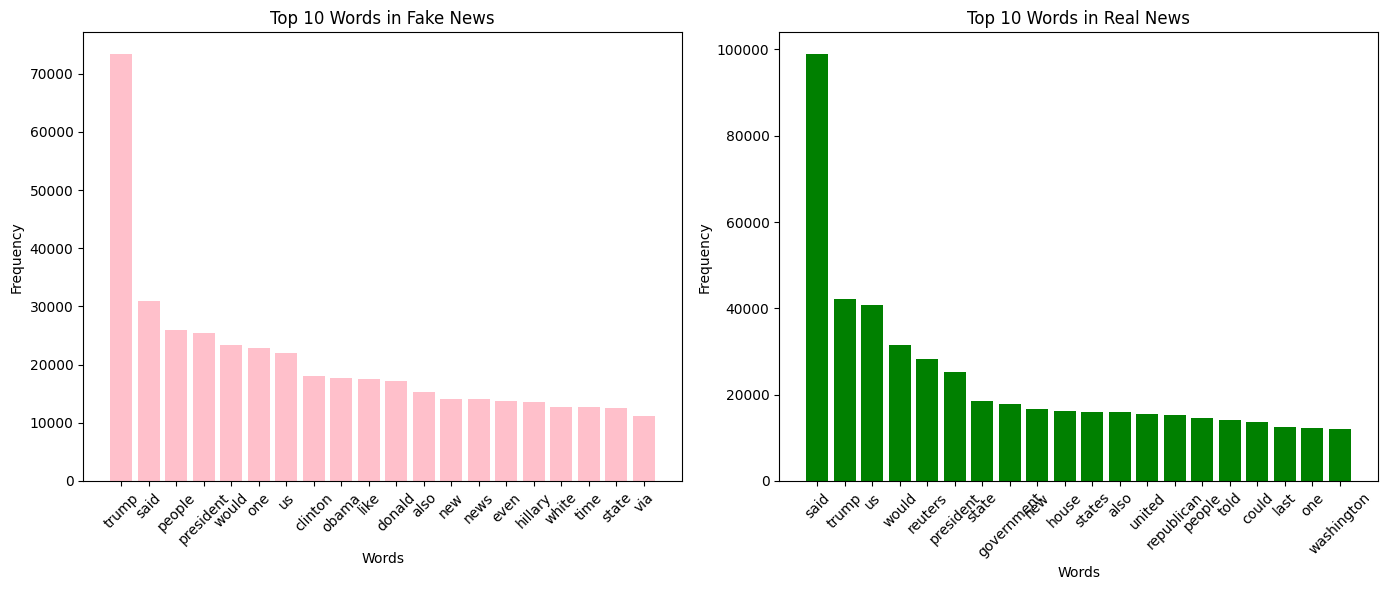

In [88]:
# Most  frequent words counter
# Fake News Word Frequency
fake_words = ' '.join(df[df['label'] == 1]['text']).split()
counter_fake = Counter(fake_words)
top_fake = counter_fake.most_common(20)
print("Top 20 words in Fake News:", counter_fake.most_common(20))

# Real News Word Frequency
real_words = ' '.join(df[df['label'] == 0]['text']).split()
counter_real = Counter(real_words)
top_real = counter_real.most_common(20)
print("Top 20 words in Real News:", counter_real.most_common(20))

# Unpack the top words and their counts for fake and real news
fake_words_list, fake_counts = zip(*top_fake)
real_words_list, real_counts = zip(*top_real)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Fake News Plot
axes[0].bar(fake_words_list, fake_counts, color='pink')
axes[0].set_title('Top 10 Words in Fake News')
axes[0].set_xlabel('Words')
axes[0].set_ylabel('Frequency')
axes[0].set_xticklabels(fake_words_list, rotation=45)

# Real News Plot
axes[1].bar(real_words_list, real_counts, color='green')
axes[1].set_title('Top 10 Words in Real News')
axes[1].set_xlabel('Words')
axes[1].set_ylabel('Frequency')
axes[1].set_xticklabels(real_words_list, rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

In [97]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df.label, test_size=0.2,random_state=42)
print(X_train)

36335    abuja reuters nigeria atiku abubakar former vi...
12384    istanbul reuters turkey take resolution callin...
24419    light republican failure pass american health ...
24740    reuters several countries united nations journ...
27039    washington reuters president donald trump pumm...
                               ...                        
11284    gop civil war keeps getting entertainingsarah ...
44732    michael moore trump malignant narcissist https...
38158    nairobi reuters kenyan police fired teargas di...
860      paris reuters british border guard one 12 peop...
15795    putin reminds weak ineffective commander chief...
Name: text, Length: 35918, dtype: object


In [98]:
print(y_train)

36335    0
12384    0
24419    1
24740    0
27039    0
        ..
11284    1
44732    1
38158    0
860      0
15795    1
Name: label, Length: 35918, dtype: int64


## Decision Tree Classifier

In [114]:
#from os import pipe
# Vectorize the text using TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion='entropy',
                                                  max_depth=20,
                                                  splitter='best',
                                                  random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

#Accuracy
prediction = model.predict(X_test)
print("accuracy:{}%".format(round(accuracy_score(y_test, prediction)*100,2)))

# Create confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


accuracy:99.69%


NameError: name 'predictions' is not defined